# Introduction to Exploratory Data Analysis (EDA)

<img src="http://www.codeheroku.com/static/blog/images/pid17_data.png">

<blockquote>“Torture the data, and it will confess to anything.”

— Ronald Coase</blockquote>

If you are someone who is familiar with data science, I can confidently say that you must have realized the power of the above statement.

With proper utilization of data, even ruling the entire world is possible.

But, having raw, unprocessed data is meaningless unless you analyze it to get significant insights.

Exploratory Data Analysis (EDA) is the process of visualizing and analyzing data to extract significant insights from it. In other words, EDA is the process of summarizing main characteristics of data in order to gain better understanding of the dataset.

In this article, we are going to introduce you to the process of EDA through the analysis of the automobile dataset available [here](https://drive.google.com/file/d/1g7ewVnbl3zHW33eOD9DoDwJPc4f-OPU2/view?usp=sharing). We will talk about some common methods used for EDA and will let you know how to apply them for extracting meaningful insights from raw data.

Here is a quick overview of the things that you are going to learn in this article:

- Descriptive Statistics
- Grouping of Data
- Handling missing values in dataset
- ANOVA: Analysis of variance
- Correlation

At first, you need to download the [automobile dataset](https://drive.google.com/file/d/1g7ewVnbl3zHW33eOD9DoDwJPc4f-OPU2/view?usp=sharing) from [this link](https://drive.google.com/file/d/1g7ewVnbl3zHW33eOD9DoDwJPc4f-OPU2/view?usp=sharing).

## Descriptive statistics:

Descriptive statistics analysis helps to describe the basic features of dataset and obtain a brief summary of the data.

The describe() method in Pandas library helps us to have a brief summary of the dataset. It automatically calculates basic statistics for all numerical variables excluding NaN (we will come to this part later) values.

Let’s import all the libraries and read the data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = pd.read_csv('automobile.csv') #read data from CSV file

We can check if the data is successfully imported by displaying the first 5 rows of dataframe using head() method.

In [2]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Now, let’s apply the describe() method over this dataset and see the results. It displays a description of mean, standard deviation, quartiles and maximum & minimum values.

In [3]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


It helps us to have a brief overview of the data. For example, by seeing the mean of “diesel” and “gas” column, we can say that 90% of the engines run on gas while almost 10% engines run on diesel.

Now we know how how to get brief summary of numerical data using describe() method. But, what if we have categorical data? How can we get a summary of categorical data? The value_counts() method will be useful in this case.

Let’s see an example of this:

In [4]:
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

The above output tells us that our dataset has 115 cars with four doors and 86 cars with two doors.

### Box plots

A better approach of visualizing numerical data would be to use box plots. Box plot shows us the median of the data, which represents where the middle data point is. The upper and lower quartiles represent the 75 and 25 percentile of the data respectively. The upper and lower extremes shows us the extreme ends of the distribution of our data. Finally, it also represents outliers, which occur outside the upper and lower extremes.

<img src="http://www.codeheroku.com/static/blog/images/pid17_bxplt_desc.png">

For example, the following code shows us the distribution of price for cars with different number of cylinders.

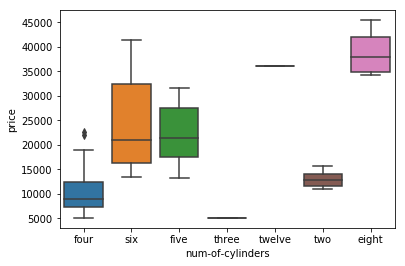

In [5]:
sns.boxplot(x='num-of-cylinders',y='price',data=df)

We can see that the price of eight-cylinder cars lies between 35000 to 45000, while the price of four-cylinder cars lies between 5000 to 19000. It also tells us that the average price of five-cylinder cars and six-cylinder cars is almost same.

### Scatter plots

Often, we see some continuous variables in our data within a specific range. For example, in our dataset, engine size and price are continuous variables. What if we want to understand the relationship between these continuous variables? Could engine size possibly predict the price of the car?

A great way to visualize this relationship would be to use a scatter plot. Scatter plots represent each relationship between two continuous variables as individual data point in a 2D graph.

We will use the scatter() method of matplotlib library to visualize the scatter plot.

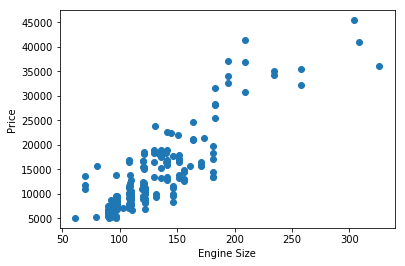

In [6]:
plt.scatter(df['engine-size'],df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')

plt.show()

From the above output, we can interpret that there is a linear relationship between engine size and price. Cars with bigger engines might be costlier than the cars with small-sized engines. This thing totally makes sense, right?

### Histograms

Histogram shows us the frequency distribution of a variable. It partitions the spread of numeric data into parts called as “bins” and then counts the number of data points that fall into each bin. So, the vertical axis actually represents the number of data points in each bin.

Let’s see an example of this. We will see the distribution of “peak-rpm” using histogram.

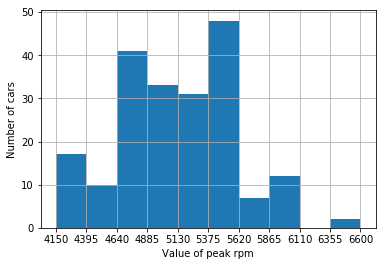

In [7]:
count,bin_edges = np.histogram(df['peak-rpm'])

df['peak-rpm'].plot(kind='hist',xticks=bin_edges)

plt.xlabel('Value of peak rpm')
plt.ylabel('Number of cars')
plt.grid()


The above output tells us that there are 10 cars which have peak rpm between 4395 and 4640, around 42 cars have peak rpm between 4640 and 4885 and so on.

## Grouping of data

Assume that you want to know the average price of different types of vehicles and observe how they differ according to body styles and number of doors. A nice way to do this would be to group the data according to “body-style” and “num-of-doors” and then see the average price across each category. The groupby() method from Pandas library helps us to accomplish this task.

In [8]:
df_temp = df[['num-of-doors','body-style','price']]

df_group = df_temp.groupby(['num-of-doors','body-style'],as_index=False).mean()

df_group

,num-of-doors,body-style,price
0,four,hatchback,8372.000000
1,four,sedan,14490.687500
2,four,wagon,12371.960000
3,two,convertible,21890.500000
4,two,hardtop,22208.500000
5,two,hatchback,10230.793103
6,two,sedan,14283.000000


The above output tells us that two door hardtop and two door convertibles are the most expensive cars, whereas, four door hatchbacks are the cheapest.

A table of this form is not very easy to read. So, we can convert this table to a pivot table using the pivot() method, which would allow us to read this table in a better fashion.

In [9]:
df_pivot = df_group.pivot(index='body-style',columns='num-of-doors')

df_pivot

price              
num-of-doors        four           two
body-style                            
convertible          NaN  21890.500000
hardtop              NaN  22208.500000
hatchback      8372.0000  10230.793103
sedan         14490.6875  14283.000000
wagon         12371.9600           NaN

The price data now becomes a rectangular grid, which is easier to visualize.

## Handling missing values

When no data value is stored for a feature in a particular observation, we say this feature has missing values. Examining this is important because when some of your data is missing, it can lead to weak or biased analysis.

We can detect missing values by applying isnull() method over the dataframe. The isnull() method returns a rectangular grid of boolean values which tells us if a particular cell in the dataframe has missing value or not.

In [10]:
df.isnull()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As you can see, analyzing a grid of this style to detect missing value is not very convenient, so we will use heatmaps to visually detect these missing values.

### Heatmap

Heatmap takes a rectangular data grid as input and then assigns a color intensity to each data cell based on the data value of the cell. This is a great way to get visual clues about the data.

We will generate a heatmap of the output of isnull() in order to detect missing values.

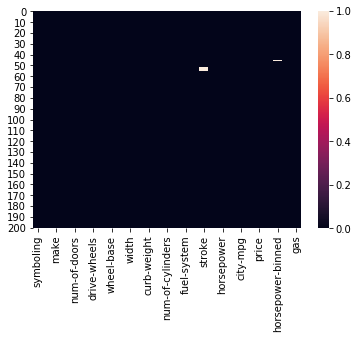

In [11]:
sns.heatmap(df.isnull())

This indicates that “stroke” and “horsepower-binned” columns have few missing values.

We can handle missing values in many ways:

- **Delete:** You can delete the rows with the missing values or delete the whole column which has missing values. The dropna() method from Pandas library can be used to accomplish this task.
- **Impute:** Deleting data might cause huge amount of information loss. So, replacing data might be a better option than deleting. One standard replacement technique is to replace missing values with the average value of the entire column. For example, we can replace the missing values in “stroke” column with the mean value of stroke column. The fillna() method from Pandas library can be used to accomplish this task.
- **Predictive filling:** Alternatively, you can choose to fill missing values through predictive filling. The interpolate() method will perform a linear interpolation in order to “guess” the missing values and fill the results in the dataset.

## ANOVA (Analysis of Variance)

ANOVA is a statistical method which is used for figuring out the relation between different groups of categorical data. The ANOVA test, gives us two measures as result:

F-test score: It calculates the variation between sample group means divided by variation within sample group.

P value: It shows us the confidence degree. In other words, it tells us whether the obtained result is statistically significant or not.

Let’s take an example to understand this better.

The following bar chart shows the average price of different car makes.

<img src="http://www.codeheroku.com/static/blog/images/pid17_anova1.png">

We can see that the average price of “audi” and “volvo” is almost same. But, the average price of “jaguar” and “honda” differ significantly.

So, we can say that there is very small variance between “audi” and “volvo” because their average price is almost same. While the variance between “jaguar” and “honda” is significantly high. Let’s verify this using the ANOVA method.

The ANOVA test can be performed using the f_oneway() method from Scipy library .

In [12]:
temp_df = df[['make','price']].groupby(['make'])

stats.f_oneway(temp_df.get_group('audi')['price'],temp_df.get_group('volvo')['price'])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

The result confirms what we guessed at first. Since the variance between the price of “audi” and “volvo” is very small, we got a F-test score which is very small (around 0.01) and a p value around 0.9.

Let’s do this test once more between “jaguar” and “honda” and see the results.

In [13]:
stats.f_oneway(temp_df.get_group('jaguar')['price'],temp_df.get_group('honda')['price'])

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

Notice that in this case, we got a very high F-Test score(around 401) with a p value around 1.05 * 10^-11 because, the variance between the average price of “jaguar” and “honda” is huge.

## Correlation

Correlation is a statistical metric for measuring to what extent different variables are interdependent.

In other words, when we look at two variables over time, if one variable changes, how does

this effect change in the other variable?

For example, smoking is known to be correlated with lung cancer. Since, smoking increases the chances of lung cancer.

Another example would be the relationship between the number of hours a student studies and the score obtained by that student. Because, we expect the student who studies more to obtain higher marks in the exam.

We can see the correlation between different variables using the corr() function. Then we can plot a heatmap over this output to visualize the results.


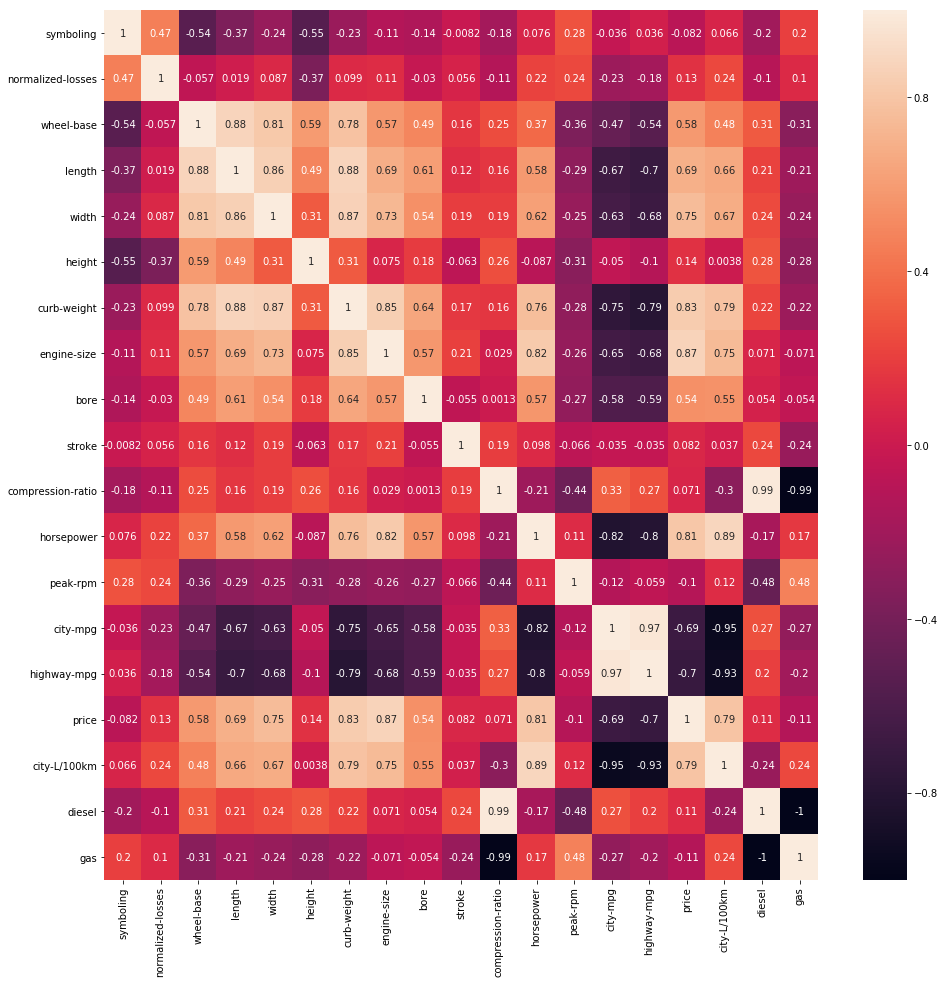

In [14]:
plt.figure(figsize=(16,16)) #Plot a big(16x16) figure

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)


From the above heatmap, we can see that engine size and price are positively correlated(score of 0.87) with each other while, highway-mpg and price are negatively correlated(score of -0.7) with each other. In other words, it tells us that cars with larger engine sizes will be costlier than cars with small engine sizes. It also tells us that expensive cars generally have less MPG as compared to cheaper cars.

Let’s verify this relationship by plotting regression plots between these variables.

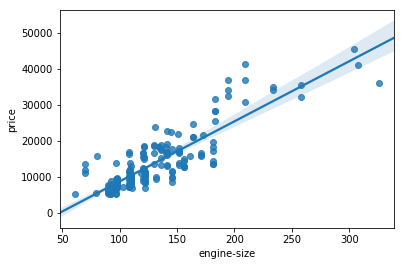

In [15]:
sns.regplot(x='engine-size',y='price',data=df)

The above plot shows the positive correlation between engine size and price.

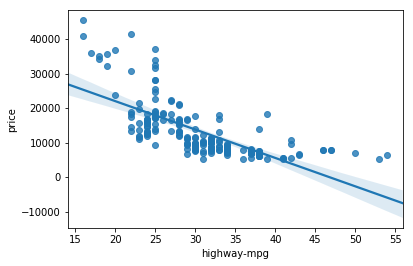

In [16]:
sns.regplot(x='highway-mpg',y='price',data=df)

The above plot shows us the negative correlation between “highway-mpg” and “price”.

This was a brief introduction to Exploratory Data Analysis. Follow our [Medium publication](https://medium.com/code-heroku) to get regular updates on these kind of tutorials.

If you enjoyed reading this article, please have a look at our [Introduction to Machine Learning](http://www.codeheroku.com/course?course_id=1) course at [Code Heroku](http://www.codeheroku.com/).

<br><br>
<p align="center">
<a href="http://www.codeheroku.com/">
<img src="http://www.codeheroku.com/static/images/logo5.png">
</a>
</p>